<a href="https://colab.research.google.com/github/yohanesnuwara/bsc-thesis-carbon-capture-storage/blob/master/main/01_reservoir_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reservoir Simulation

This first part notebook reads a reservoir simulation result (in this case is from Petrel). There are 2 results provided: Case 1 is simulation result of reservoir without CO2 injection, and Case 2 is simulation result of reservoir with CO2 injection. From it, we will compute reservoir pressure increase due to CO2 injection. 

Import libraries.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Clone from my Github repo.

In [1]:
! git clone https://github.com/yohanesnuwara/bsc-thesis-carbon-capture-storage/

Cloning into 'bsc-thesis-carbon-capture-storage'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 107 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (107/107), 12.86 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (47/47), done.


Under `data` folder, there are 2 simulation results in Excel. First, define the columns. 

In [0]:
col = np.array(['Date', 'Days', 'WSAT', 'OSAT', 'GSAT', 'GMT', 'OMR', 'GMR', 'GCDI', 'GCDM', 'WCD',
              'WGR', 'WCT', 'VPR', 'VPT', 'VIR', 'VIT', 'WPR', 'OPR', 'GPR', 'WPT', 'OPT', 'GPT',
              'PR', 'GIR', 'GIT', 'GOR'])

Import the reservoir simulation data.

In [0]:
case1 = pd.read_excel(r'/content/bsc-thesis-carbon-capture-storage/data/CASE_1.xlsx'); case1 = pd.DataFrame(case1, columns=col) #INJ-2, 15 MMSCFD, kv/kh = 0.1
case2 = pd.read_excel(r'/content/bsc-thesis-carbon-capture-storage/data/CASE_2.xlsx'); case2 = pd.DataFrame(case2, columns=col) #INJ-2, 15 MMSCFD, kv/kh = 0.1

In [0]:
# declare the date in datetime format
Date = pd.to_datetime(case1['Date'])

In [0]:
# declare the pressure data
PR1 = case1['PR']
PR2 = case2['PR']

Compute the increase of reservoir pressure.

In [0]:
Pincrease = PR1 - PR2

Visualize the reservoir pressure of each CASE, from start of production 01/01/2014 to 01/01/2029. The CO2 injection is introduced on 01/01/2019 and ended on 01/01/2029

(735234.0, 740713.0)

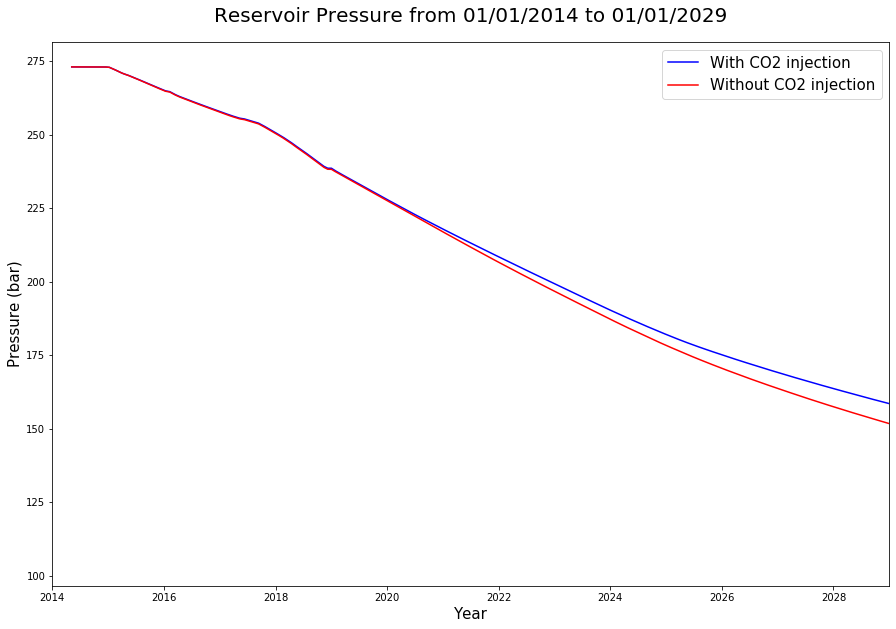

In [42]:
# Convert panda datetime to matplotlib
pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(15, 10))
p1 = plt.plot(Date, PR1, color='blue')
p2 = plt.plot(Date, PR2, color='red')
plt.legend((p1[0], p2[0]), ('With CO2 injection', 'Without CO2 injection'), prop={'size': 15})
plt.xlabel("Year", size=15); plt.ylabel("Pressure (bar)", size=15)
plt.title("Reservoir Pressure from 01/01/2014 to 01/01/2029", size=20, pad=20)
plt.xlim('2014-01-01', '2029-01-01')

The reservoir pressure drops significantly without CO2 injection. Therefore, the injection of CO2 provides pressure support to the reservoir. The increase of pressure happens in the CO2 zone. Injection starts on 01/01/2019 and stops 01/01/2029. Let us visualize the pressure increase. 

(737060.0, 740713.0)

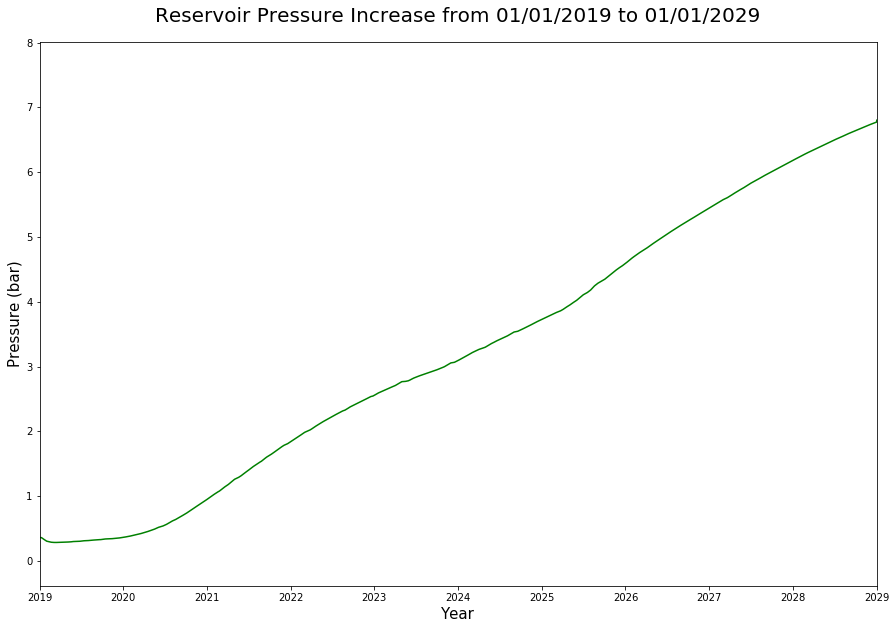

In [44]:
plt.figure(figsize=(15, 10))
p1 = plt.plot(Date, Pincrease, color='green')
plt.xlabel("Year", size=15); plt.ylabel("Pressure (bar)", size=15)
plt.title("Reservoir Pressure Increase from 01/01/2019 to 01/01/2029", size=20, pad=20)
plt.xlim('2019-01-01', '2029-01-01')